# 🦄 가랏, 몬스터볼! 전설의 포켓몬 찾아 삼만리

## 1. 라이브러리 불러오기 

In [1]:
# 라이브러리 가져오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
print('슝=3')

슝=3


## 2. 포켓몬 데이터 불러오기

In [2]:
# 데이터셋을 pandas로 불러오기
import os
csv_path = os.getenv("HOME") +"/aiffel/pokemon_eda/data/Pokemon.csv"
original_data = pd.read_csv(csv_path)
print('슝=3')

슝=3


In [3]:
# pokemon 변수에 데이터를 저장하고, pandas로 데이터를 나타내기
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#### > 데이터 살펴보기
__총 800행, 13열__
- #: 포켓몬 Id number. 성별이 다르지만 같은 포켓몬인 경우 등은 같은 #값을 가진다. - int
- Name: 포켓몬 이름. 포켓몬 각각의 이름으로 저장되고, 800개의 포켓몬의 이름 데이터는 모두 다르다. (unique) - str
- Type 1: 첫 번째 속성. 속성을 하나만 가지는 경우 Type 1에 입력된다. - str
- Type 2: 두 번째 속성. 속성을 하나만 가지는 포켓몬의 경우 Type 2는 NaN(결측값)을 가진다. - str
- Total: 전체 6가지 스탯의 총합. - int
- HP: 포켓몬의 체력. - int
- Attack: 물리 공격력. (scratch, punch 등) - int
- Defense: 물리 공격에 대한 방어력. - int
- Sp. Atk: 특수 공격력. (fire blast, bubble beam 등) - int
- Sp. Def: 특수 공격에 대한 방어력. - int
- Speed: 포켓몬 매치에 대해 어떤 포켓몬이 먼저 공격할지를 결정. (더 높은 포켓몬이 먼저 공격한다) - int
- Generation: 포켓몬의 세대. 현재 데이터에는 6세대까지 있다. - int
- Legendary: 전설의 포켓몬 여부. __Target feature__ - bool  
 

### 데이터셋을 전설의 포켓몬과 일반 포켓몬으로 나누기
피쳐 'Legendary' 값이 True이면 legenday, False이면 ordinary로 데이터셋을 나눈다.

In [4]:
# 전설의 포켓몬 데이터셋 - legendary
legendary = pokemon[pokemon["Legendary"] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [5]:
# 일반 포켓몬 데이터셋 - ordinary
ordinary = pokemon[pokemon["Legendary"] == False].reset_index(drop=True)
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## 결측치와 전체 컬럼

### 결측치 확인하기

In [6]:
# 결측치 확인
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

#### > 결측치 확인
속성이 하나뿐인 포켓몬은 "Type 2"의 값이 비어있다.

### 컬럼별로 데이터 확인하기

#### 1) 전체 컬럼

In [7]:
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

#### 2) #: ID number

In [8]:
len(set(pokemon["#"]))

721

In [9]:
pokemon[pokemon["#"] == 6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


#### > "#" 컬럼 이해하기
총 800개의 컬럼인데 '#' 컬럼은 721개의 데이터를 가진다.   
unique 하지 않으며 같은 번호를 가지는 컬럼들이 있음을 알 수 있다 -> index로 사용할 수 없다.

#### 3) Name: 이름

In [10]:
pokemon['Name'].nunique()

800

In [11]:
len(set(pokemon["Name"]))

800

#### > "Name" 컬럼 이해하기
unique한 800개의 데이터를 가진다.   

#### 4) Type 1 & Type 2: 포켓몬의 속성

In [12]:
pokemon.loc[[6, 10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [13]:
# 속성의 종류
len(list(set(pokemon["Type 1"]))), len(list(set(pokemon["Type 2"])))

(18, 19)

In [14]:
# 차집합
set(pokemon["Type 2"]) - set(pokemon["Type 1"])

{nan}

#### > "Type1", "Type2" 컬럼 이해하기(1)
NaN 데이터 외의 나머지 18가지 속성은 Type 1, Type 2 모두 같은 세트의 데이터가 들어가 있다.

In [15]:
# 모든 type을 types 변수에 저장
types = list(set(pokemon["Type 1"]))
print(len(types))
print(types)

18
['Ghost', 'Bug', 'Flying', 'Dragon', 'Grass', 'Normal', 'Poison', 'Ice', 'Dark', 'Electric', 'Steel', 'Fairy', 'Fighting', 'Psychic', 'Ground', 'Water', 'Rock', 'Fire']


In [16]:
# 속성을 하나만 가지고 있는 포켓몬의 수
pokemon["Type 2"].isna().sum()

386

#### 전설의 포켓몬과 일반 포켓몬의 속성 분포 확인(Type 1)

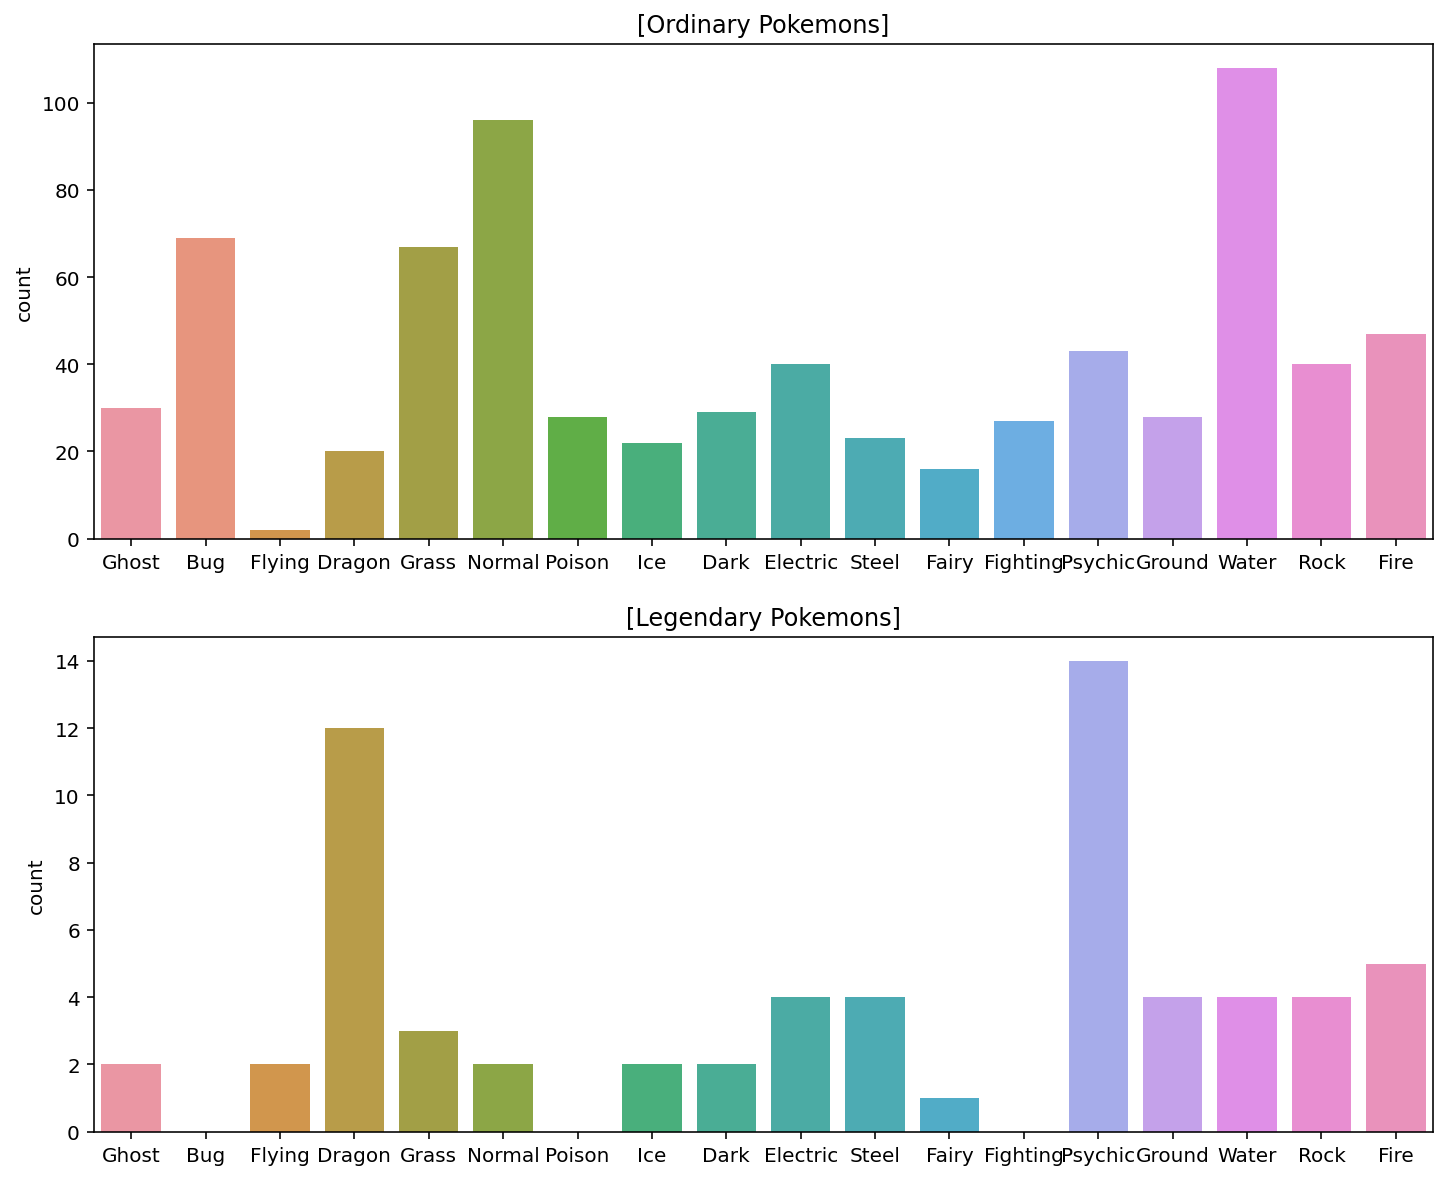

In [17]:
# Type 1 데이터 분포 plot
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [18]:
# 전설의 포켓몬의 Poison, Fighting, Bug 속성 확인하기
type_check1 = ['Poison', 'Fighting', 'Bug']
legendary[legendary['Type 1'].isin(type_check1)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


#### > "Type1", "Type2" 컬럼 이해하기(2)
일반 포켓몬은 Water, Normal, Bug, Grass 등의 속성을 많이 가지고 있다.   
전설의 포켓몬은 Psychic, Dragon 속성을 많이 가지고 있고, Poison, Fighting, Bug 속성을 주속성으로 가진 전설의 포켓몬은 없다.

In [19]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


#### > "Type1", "Type2" 컬럼 이해하기(3)
Type1만 살펴보면 Flying, Dragon, Psyhic 속성을 가진 포켓몬들 중 전설의 포켓몬 비율이 높다.

#### 전설의 포켓몬과 일반 포켓몬의 속성 분포 확인(Type 2)

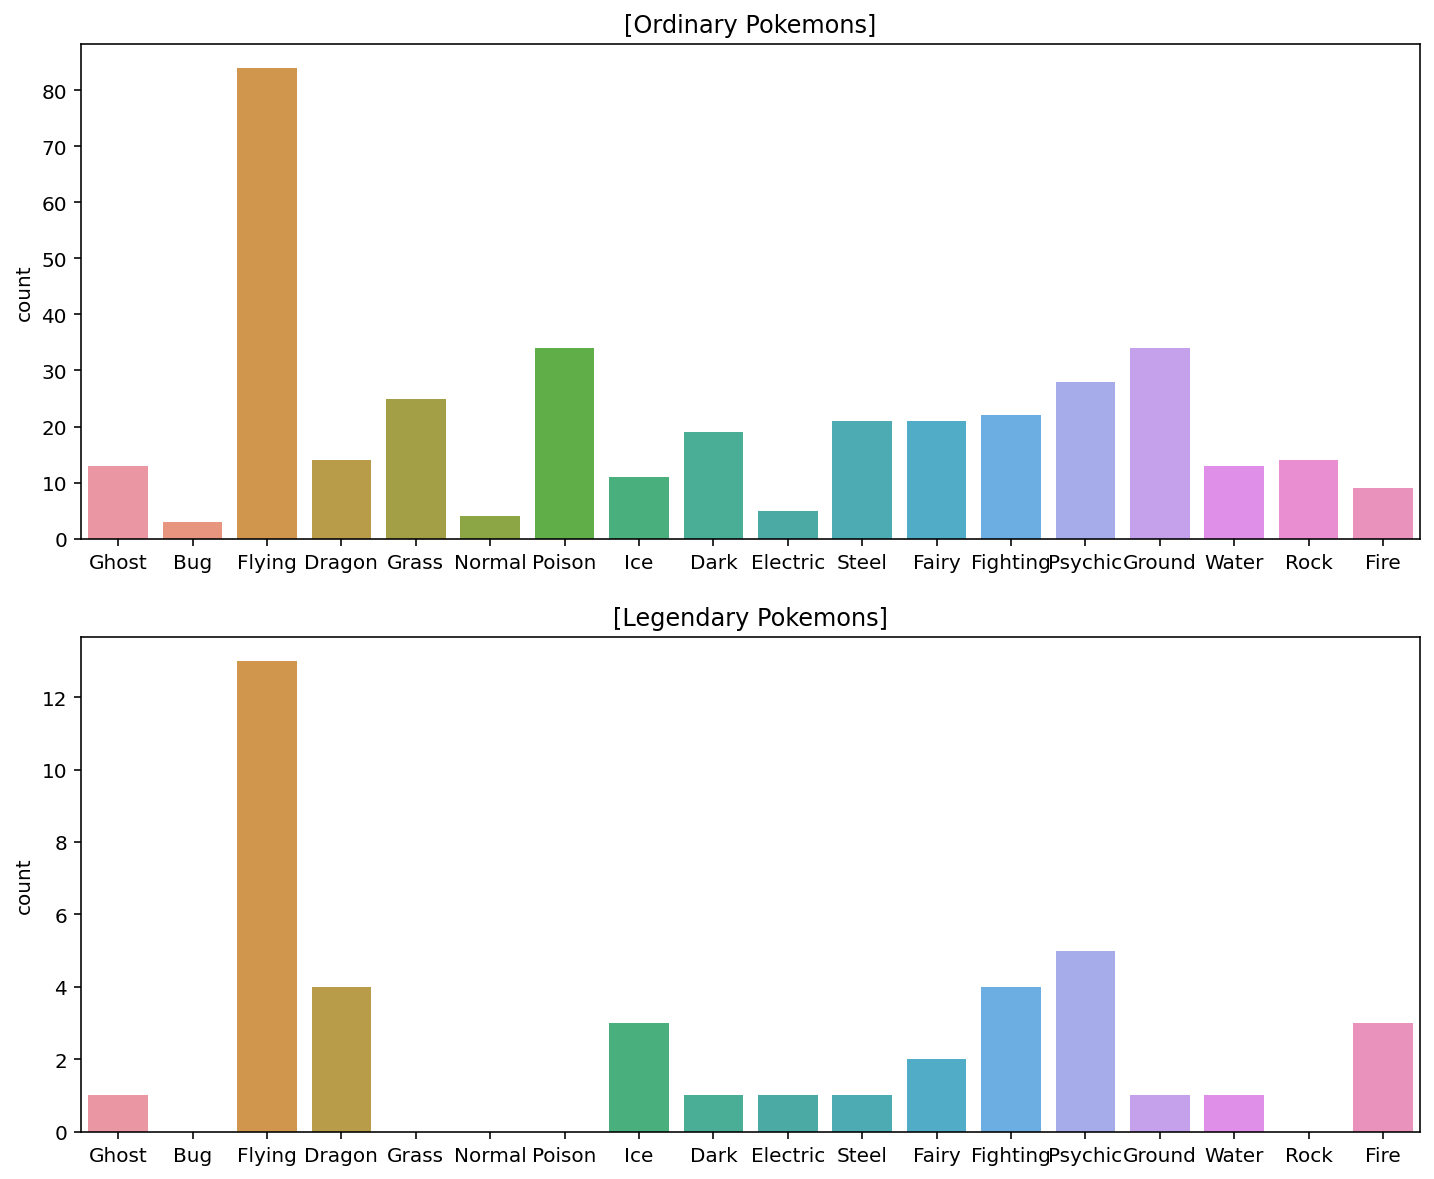

In [20]:
# Countplot을 그릴 때는 결측값은 자동으로 제외됩니다.
plt.figure(figsize=(12, 10))  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

In [21]:
# 전설의 포켓몬의 Poison, Normal, Grass, Bug, Rock 속성 확인하기
type_check2 = ['Poison', 'Normal', 'Grass', 'Bug', 'Rock']
legendary[legendary['Type 2'].isin(type_check2)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


#### > "Type1", "Type2" 컬럼 이해하기(4)
일반 포켓몬과 전설의 포켓몬 둘 다 Flying 속성을 가장 많이 가지고 있다.   
그리고 일반 포켓몬은 Water, Normal, Bug, Grass 등의 속성을 많이 가지고 있다.      
전설의 포켓몬은 Psychic, Dragon 속성을 많이 가지고 있고, Poison, Normal, Grass, Bug, Rock 속성을 추가로 가지고 있는 전설의 포켓몬은 없다.

In [22]:
# Type2별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(pokemon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


#### > "Type1", "Type2" 컬럼 이해하기(5)
Type2만 살펴보면 Fire, Dragon, Ice 속성을 가진 포켓몬들 중 전설의 포켓몬 비율이 높다.

#### 5) Total : 모든 스탯의 총합

In [23]:
# 모든 스탯의 종류를 stats라는 변수에 저장
stats = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [24]:
print("#0 pokemon: ", pokemon.loc[0, "Name"])
print("total: ", int(pokemon.loc[0, "Total"]))
print("stats: ", list(pokemon.loc[0, stats]))
print("sum of all stats: ", sum(list(pokemon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [25]:
pokemon['Total'].values

array([318, 405, 525, 625, 309, 405, 534, 634, 634, 314, 405, 530, 630,
       195, 205, 395, 195, 205, 395, 495, 251, 349, 479, 579, 253, 413,
       262, 442, 288, 438, 320, 485, 300, 450, 275, 365, 505, 273, 365,
       505, 323, 483, 299, 505, 270, 435, 245, 455, 320, 395, 490, 285,
       405, 305, 450, 265, 405, 290, 440, 320, 500, 305, 455, 350, 555,
       300, 385, 510, 310, 400, 500, 590, 305, 405, 505, 300, 390, 490,
       335, 515, 300, 390, 495, 410, 500, 315, 490, 590, 325, 465, 352,
       310, 460, 325, 475, 325, 500, 305, 525, 310, 405, 500, 600, 385,
       328, 483, 325, 475, 330, 480, 325, 520, 320, 425, 455, 455, 385,
       340, 490, 345, 485, 450, 435, 490, 590, 295, 440, 320, 450, 340,
       520, 460, 500, 455, 490, 495, 500, 600, 490, 200, 540, 640, 535,
       288, 325, 525, 525, 525, 395, 355, 495, 355, 495, 515, 615, 540,
       580, 580, 580, 300, 420, 600, 680, 780, 780, 600, 318, 405, 525,
       309, 405, 534, 314, 405, 530, 215, 415, 262, 442, 265, 39

In [26]:
pokemon[stats].values.sum(axis=1)

array([318, 405, 525, 625, 309, 405, 534, 634, 634, 314, 405, 530, 630,
       195, 205, 395, 195, 205, 395, 495, 251, 349, 479, 579, 253, 413,
       262, 442, 288, 438, 320, 485, 300, 450, 275, 365, 505, 273, 365,
       505, 323, 483, 299, 505, 270, 435, 245, 455, 320, 395, 490, 285,
       405, 305, 450, 265, 405, 290, 440, 320, 500, 305, 455, 350, 555,
       300, 385, 510, 310, 400, 500, 590, 305, 405, 505, 300, 390, 490,
       335, 515, 300, 390, 495, 410, 500, 315, 490, 590, 325, 465, 352,
       310, 460, 325, 475, 325, 500, 305, 525, 310, 405, 500, 600, 385,
       328, 483, 325, 475, 330, 480, 325, 520, 320, 425, 455, 455, 385,
       340, 490, 345, 485, 450, 435, 490, 590, 295, 440, 320, 450, 340,
       520, 460, 500, 455, 490, 495, 500, 600, 490, 200, 540, 640, 535,
       288, 325, 525, 525, 525, 395, 355, 495, 355, 495, 515, 615, 540,
       580, 580, 580, 300, 420, 600, 680, 780, 780, 600, 318, 405, 525,
       309, 405, 534, 314, 405, 530, 215, 415, 262, 442, 265, 39

In [27]:
total = pokemon['Total'].values
stats_sum = pokemon[stats].values.sum(axis=1)

count=0
for i in range(800):
    if total[i] == stats_sum[i]:
        count += 1
    
count

800

#### > "Total" 컬럼 이해하기(1)
Total의 데이터는 모든 stat의 총합이다.

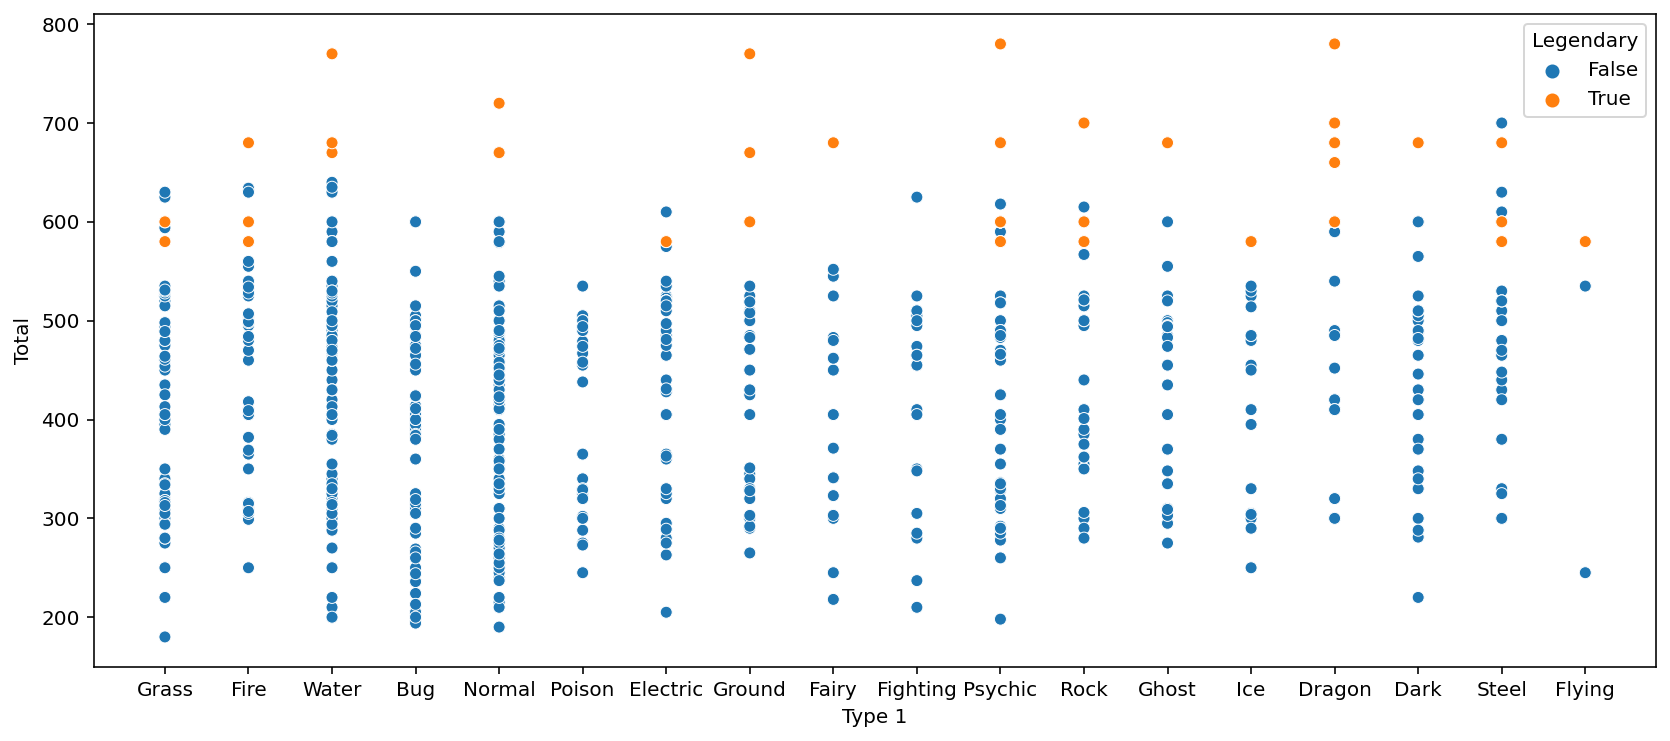

In [28]:
# Total값에 따른 분포 plot
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

sns.scatterplot(data=pokemon, x="Type 1", y="Total", hue="Legendary")
plt.show()

#### > "Total" 컬럼 이해하기(2)
전설의 포켓몬은 주로 Total 스탯 값이 높다

### 6) 세부스탯: HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

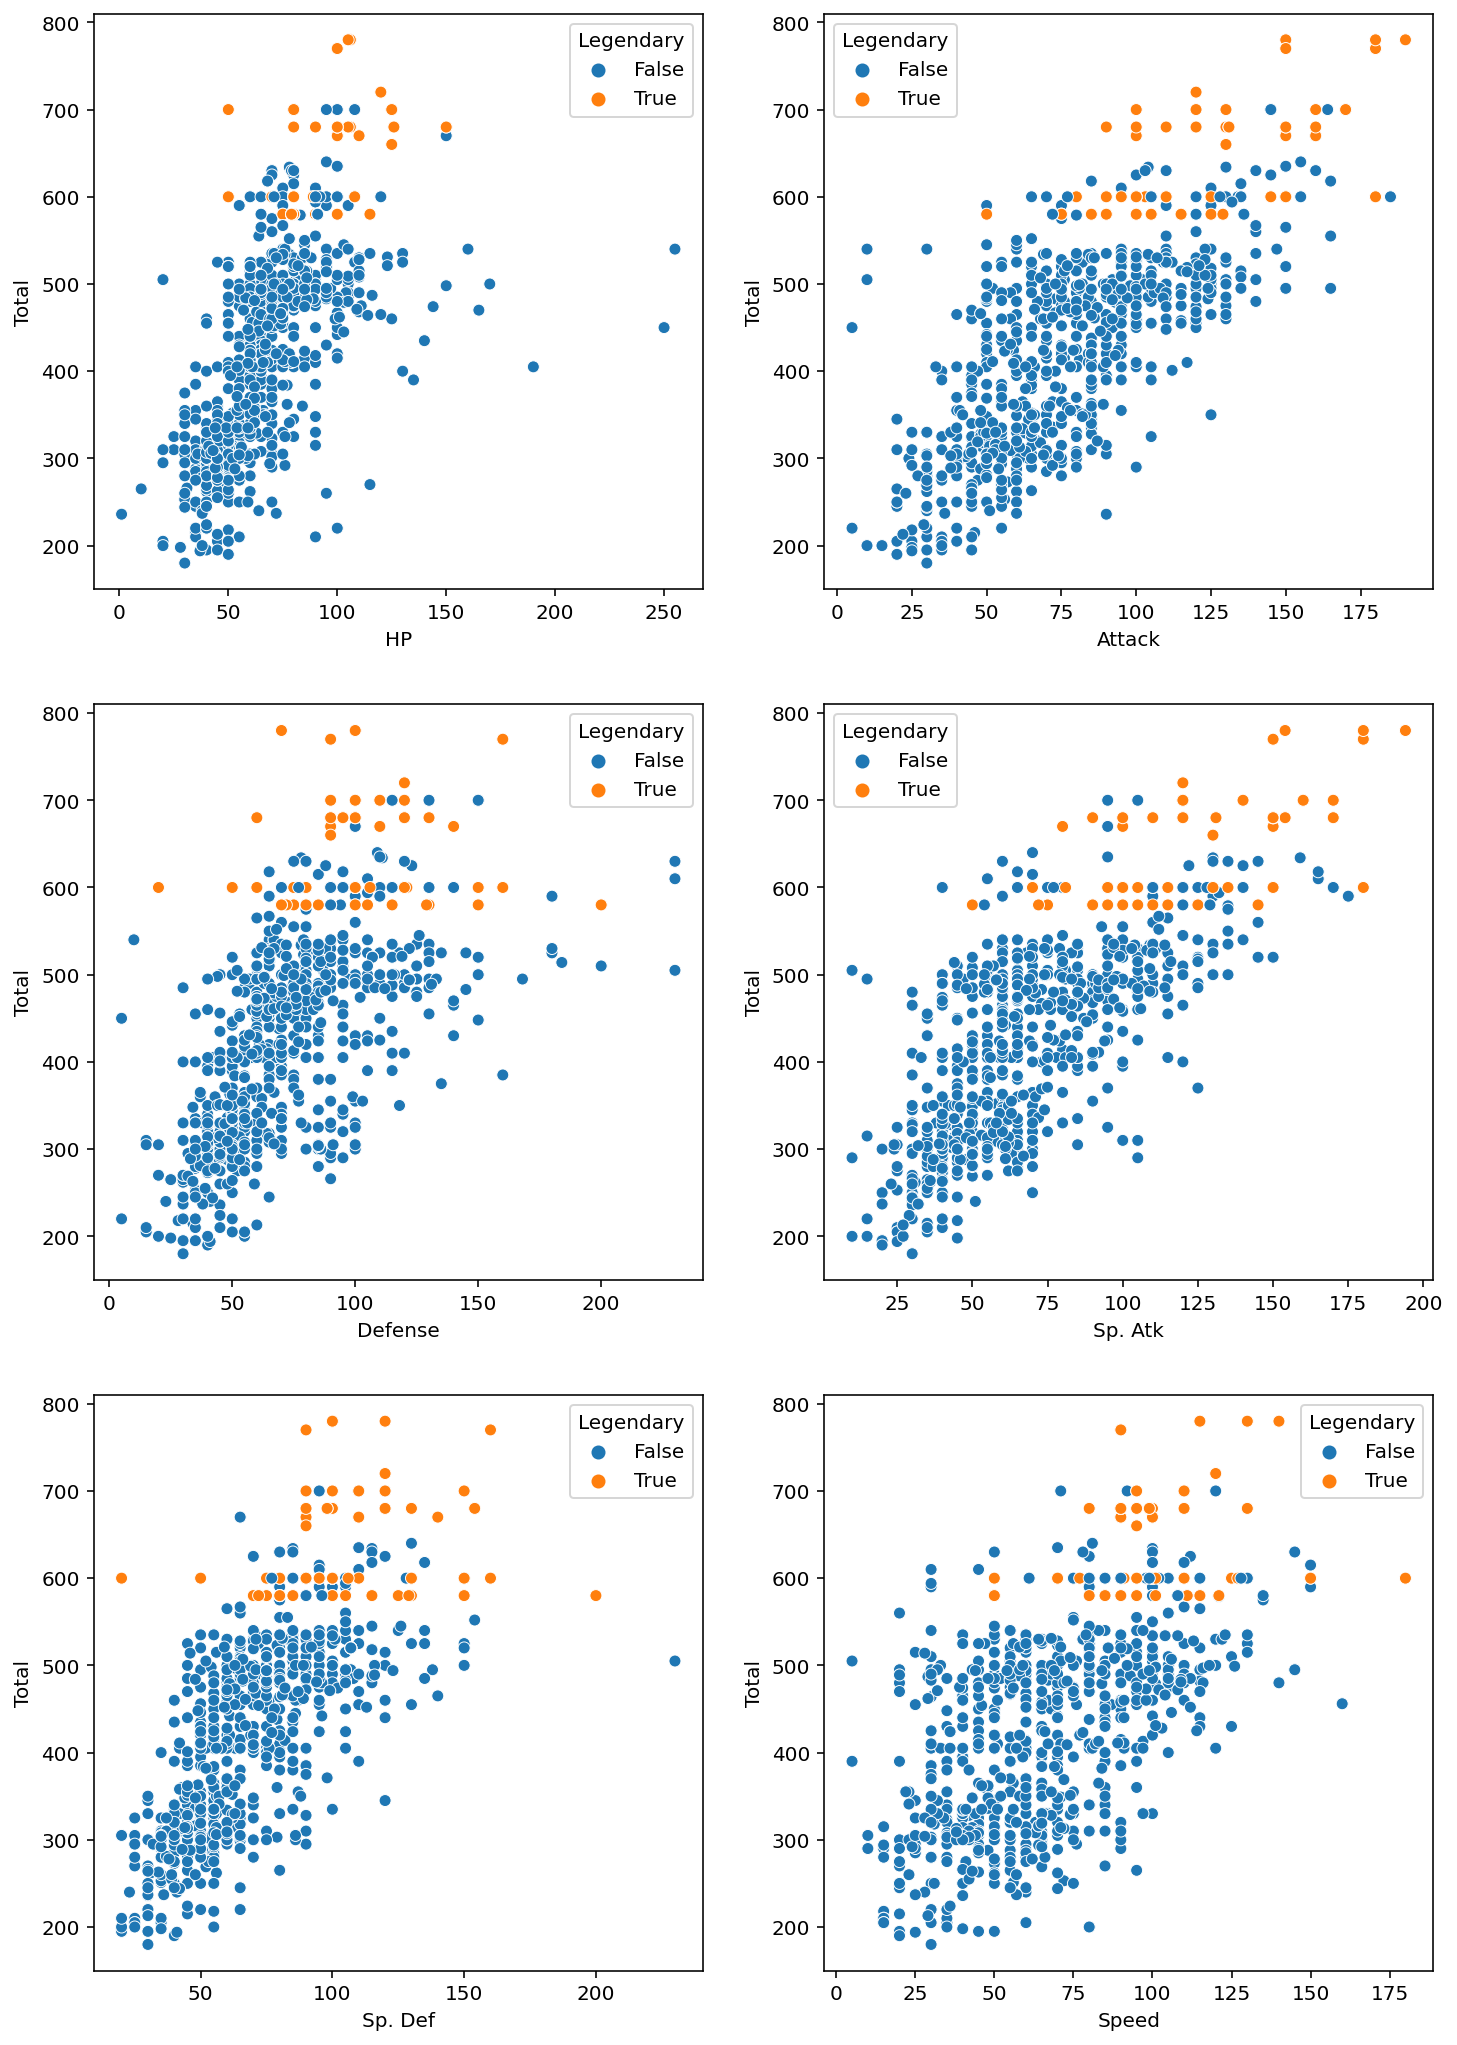

In [29]:
# 각각의 스탯에 대한 scatter plot을 6개의 subplot으로 표현합니다.

figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12, 18)  # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

# "HP" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="HP", hue="Legendary", ax=ax1)

# "Attack" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Attack", hue="Legendary", ax=ax2)

# "Defense" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Defense", hue="Legendary", ax=ax3)

# "Sp. Atk" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Atk", hue="Legendary", ax=ax4)

# "Sp. Def" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Sp. Def", hue="Legendary", ax=ax5)

# "Speed" 스탯의 scatter plot
sns.scatterplot(data=pokemon, y="Total", x="Speed", hue="Legendary", ax=ax6)

plt.show()

#### > "HP, Attack, Defense, Sp. Atk, Sp. Def, Speed" 컬럼 이해하기
- HP, Defense, Sp. Def
    - 전설의 포켓몬은 주로 높은 스탯을 갖지만, 이 세 가지에서는 일반 포켓몬이 전설의 포켓몬보다 특히 높은 몇몇 포켓몬이 있다.
    - 그러나 Total 값은 특별히 높지 않은 것으로 보아 특정 스탯만 특별히 높은, 즉 특정 속성에 특화된 포켓몬들로 보인다. (ex. 방어형, 공격형 등)
    
- Sp. Atk, Sp. Def, Speed
    - 이 세 가지 스탯은 Total과 거의 비례합니다.
    - 전설의 포켓몬이 각 스탯의 최대치를 차지하고 있습니다.

### 7) Generation : 포켓몬의 세대

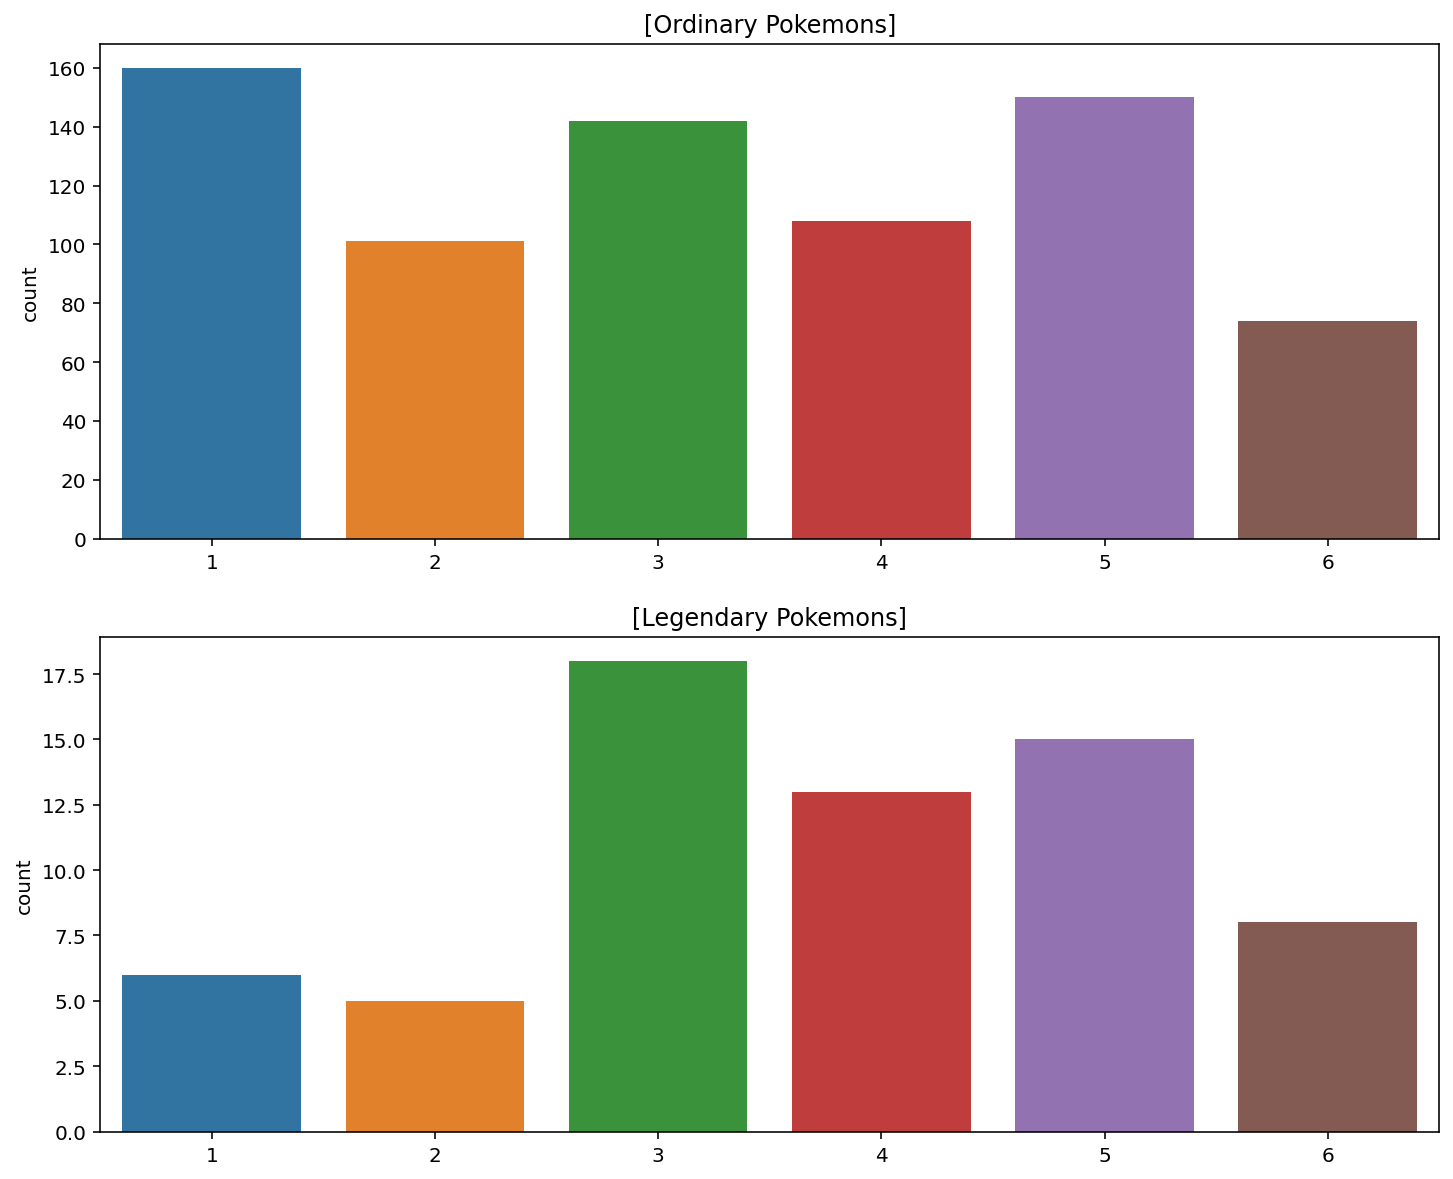

In [30]:
# 각 세대에 대한 포켓몬의 수 확인
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

#### > "Generation" 컬럼 이해하기
1, 2세대에는 많지 않았다가 3세대에서부터 많아졌다가 6세대에 다시 줄어든다.

## Total 값

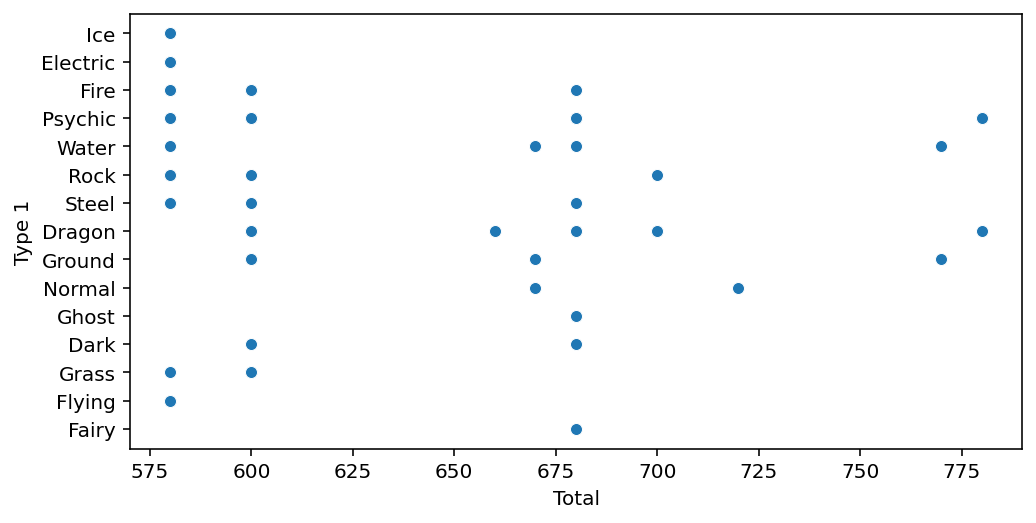

In [31]:
# 전설의 포켓몬의 Total 값
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=legendary, y="Type 1", x="Total")
plt.show()

In [32]:
# 전설의 포켓몬이 가지는 Total값들의 집합
print(sorted(list(set(legendary["Total"]))))

[580, 600, 660, 670, 680, 700, 720, 770, 780]


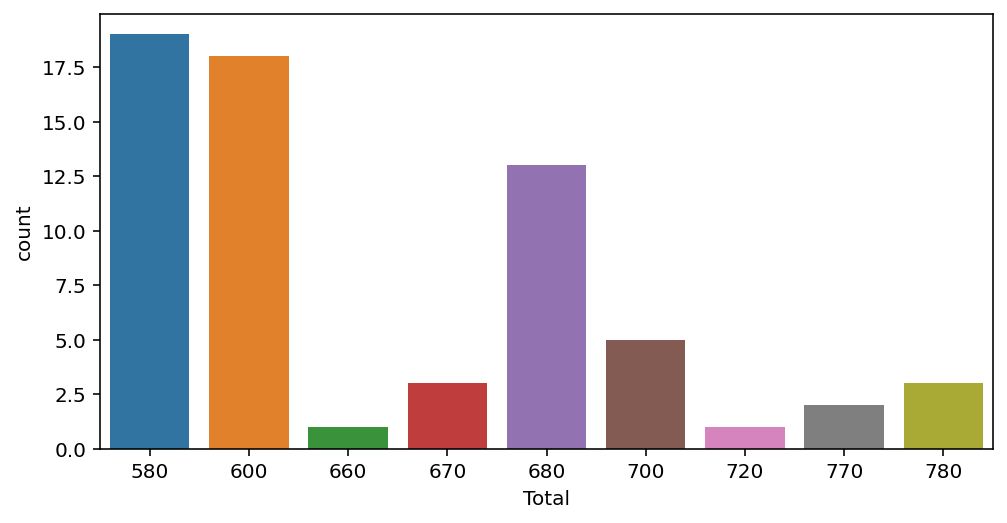

In [33]:
# 전설의 포켓몬이 가지는 각 Total값에 대한 포켓몬 수
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x="Total")
plt.show()

In [34]:
round(65 / 9, 2)

7.22

#### > 전설의 포켓몬의 Total 값
전설의 포켓몬의 Total 값은 [580, 600, 660, 670, 680, 700, 720, 770, 780] 9개 뿐이다.   
약 7.22마리 끼리는 같은 Total 스탯 값을 가진다는 의미와 같다

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]


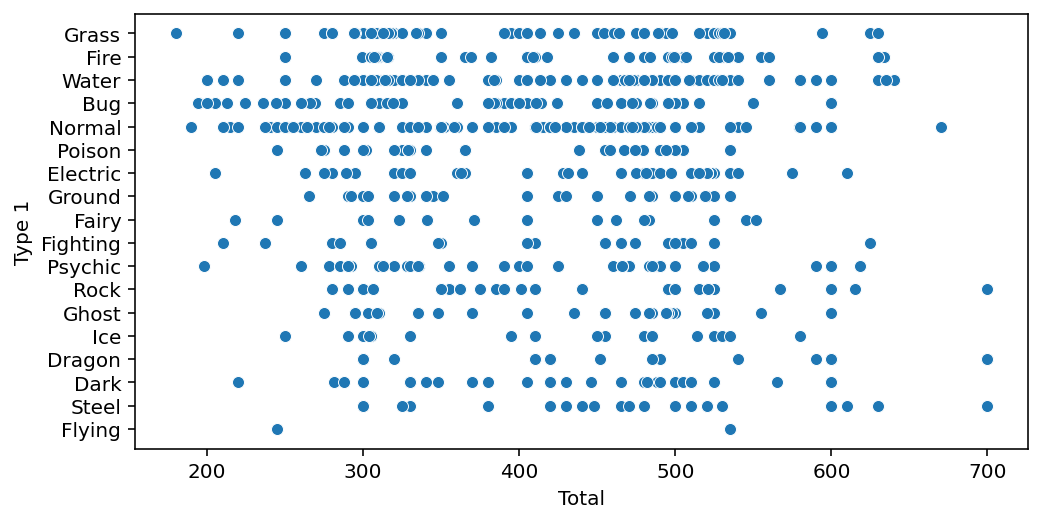

In [35]:
# 일반 포켓몬의 Total 값
# ordinary 포켓몬의 'Total' 값 집합
print(sorted(list(set(ordinary["Total"]))))
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.scatterplot(data=ordinary, y="Type 1", x="Total")
plt.show()

In [36]:
# ordinary 포켓몬의 'Total' 값 집합의 크기
print(len(sorted(list(set(ordinary["Total"])))))

195


In [37]:
round(735 / 195, 2)

3.77

#### > 일반 포켓몬의 Total 값
일반 포켓몬의 Total 값은 195개이다.   
약 3.77마리만 같은 Total 스탯 값을 가진다는 의미와 같다

### > Total은 legendary인지 아닌지 예측하는 데에 중요한 컬럼일 것이다.

## 이름

In [38]:
# 특정 단어가 들어가 있는 이름
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [39]:
formes = names[13:23]
formes

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [40]:
# "Forme"가 이름에 들어가는 일반 포켓몬
ordinary[ordinary['Name'].str.contains('Forme')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
656,647,KeldeoOrdinary Forme,Water,Fighting,580,91,72,90,129,90,108,5,False
657,647,KeldeoResolute Forme,Water,Fighting,580,91,72,90,129,90,108,5,False
658,648,MeloettaAria Forme,Normal,Psychic,600,100,77,77,128,128,90,5,False
659,648,MeloettaPirouette Forme,Normal,Fighting,600,100,128,90,77,77,128,5,False
693,681,AegislashBlade Forme,Steel,Ghost,520,60,150,50,150,50,60,6,False
694,681,AegislashShield Forme,Steel,Ghost,520,60,50,150,50,150,60,6,False


In [41]:
# "Forme"가 이름에 들어가는 전설 포켓몬
legendary[legendary['Name'].str.contains('Forme')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
25,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
26,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
27,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
28,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
36,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True
37,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True
39,492,ShayminLand Forme,Grass,NaN,600,100,100,100,100,100,100,4,True
40,492,ShayminSky Forme,Grass,Flying,600,100,103,75,120,75,127,4,True
46,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
47,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True


#### > 이름(1)
전설의 포켓몬에서 높은 빈도를 보이는 이름들의 모임이 존재한다

In [42]:
# "name_count": 이름 길이 column 추가 - legendary
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))    
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [43]:
# "name_count": 이름 길이 column 추가 - ordinary
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))    
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


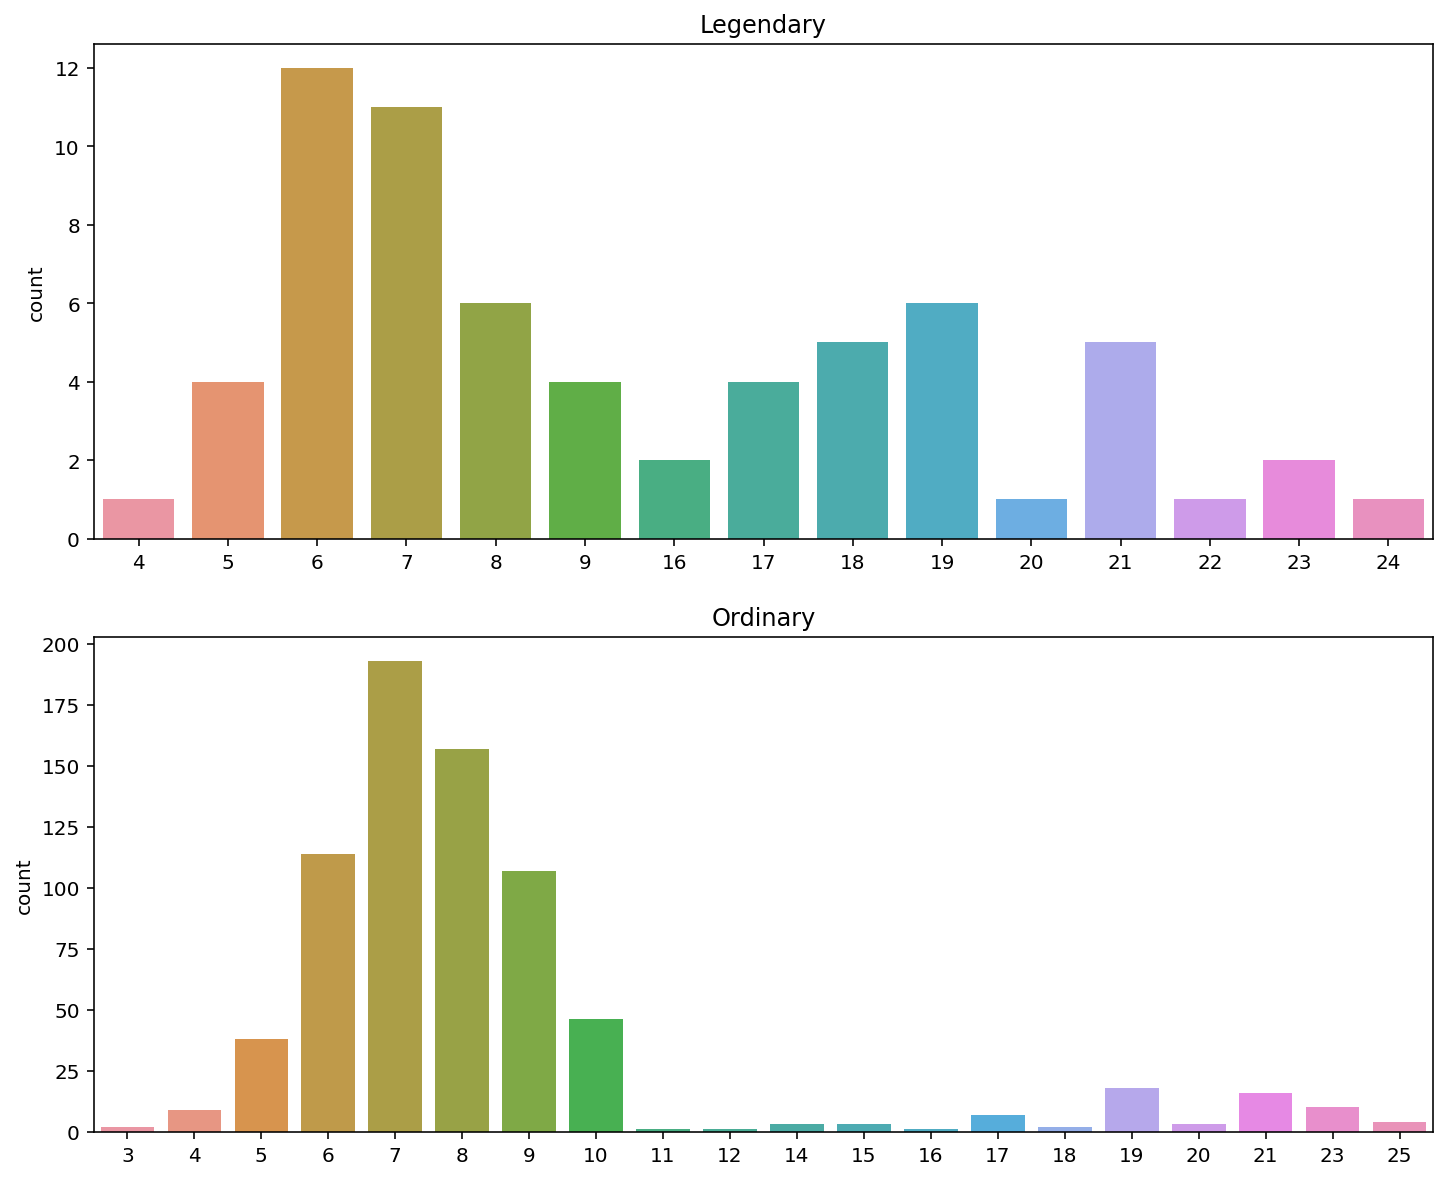

In [44]:
# countplot
plt.figure(figsize=(12, 10))   # 화면 해상도에 따라 그래프 크기를 조정해 주세요.

plt.subplot(211)
sns.countplot(data=legendary, x="name_count").set_xlabel('')
plt.title("Legendary")
plt.subplot(212)
sns.countplot(data=ordinary, x="name_count").set_xlabel('')
plt.title("Ordinary")
plt.show()

In [45]:
# 전설의 포켓몬 이름이 10 이상일 확률
print(round(len(legendary[legendary["name_count"] > 9]) / len(legendary) * 100, 2), "%")

41.54 %


In [46]:
# 일반 포켓몬 이름이 10 이상일 확률
print(round(len(ordinary[ordinary["name_count"] > 9]) / len(ordinary) * 100, 2), "%")

15.65 %


#### > 이름(1)
전설의 포켓몬은 긴 이름을 가졌을 확률이 높다.

## 데이터 전처리

### 1) 이름의 길이가 10 이상인가?

In [47]:
# 포켓몬 data에 'name_count' 컬럼 생성
pokemon["name_count"] = pokemon["Name"].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [48]:
# 'long_name' 컬럼에 10자 이상이면 True, 미만이면 False
pokemon["long_name"] = pokemon["name_count"] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


### 2) 이름에 자주 쓰이는 토큰 추출

In [49]:
# 이름에 알파벳이 아닌 문자가 들어간 경우 전처리하기
# 알파벳 체크를 위해 띄어쓰기가 없는 컬럼을 따로 만들어준 후, 띄어쓰기를 빈칸으로 처리해서 확인
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [50]:
# isalpha() -> 이름이 알파벳으로만 이루어졌는지 확인
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False,Bulbasaur,True
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False,Ivysaur,True
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False,Venusaur,True
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True,VenusaurMegaVenusaur,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True,Charmander,True


In [51]:
# 알파벳이 아닌 다른 문자가 이름에 포함된 것
print(pokemon[pokemon["name_isalpha"] == False].shape)
pokemon[pokemon["name_isalpha"] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [52]:
# 이름 직접 바꾸기
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon Two")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon Two,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon Two,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [53]:
# 다시 isalpha()
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon["name_isalpha"] = pokemon["Name_nospace"].apply(lambda i: i.isalpha())
pokemon[pokemon["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


In [54]:
# 이름 토큰화
import re

In [55]:
name = "CharizardMega Charizard X"

In [56]:
name_split = name.split(" ")
name_split

['CharizardMega', 'Charizard', 'X']

In [57]:
temp = name_split[0]
temp

'CharizardMega'

In [58]:
# 대문자로 시작해서 소문자로 끝나는 토큰들로 분리
tokens = re.findall('[A-Z][a-z]*', temp)
tokens

['Charizard', 'Mega']

In [59]:
tokens = []
for part_name in name_split:
    a = re.findall('[A-Z][a-z]*', part_name)
    tokens.extend(a)
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [60]:
# 전체 데이터셋 이름 토큰화
# Q. 다음 코드의 빈칸을 채워주세요.
def tokenize(name):
    name_split = name.split(" ")
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*', part_name)
        tokens.extend(a)
    return np.array(tokens)

In [61]:
name = "CharizardMega Charizard X"
tokenize(name)

array(['Charizard', 'Mega', 'Charizard', 'X'], dtype='<U9')

In [62]:
# 전설의 포켓몬 이름 tokenize
all_tokens = list(legendary["Name"].apply(tokenize).values)

token_set = []
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

In [63]:
import collections
my_list = ['a', 'd', 'c', 'a', 'b']
my_counter = collections.Counter(my_list)
my_counter

Counter({'a': 2, 'd': 1, 'c': 1, 'b': 1})

In [64]:
from collections import Counter

In [65]:
a = [1, 1, 0, 0, 0, 1, 1, 2, 3]
Counter(a)

Counter({1: 4, 0: 3, 2: 1, 3: 1})

In [66]:
Counter(a).most_common()

[(1, 4), (0, 3), (2, 1), (3, 1)]

In [67]:
# 전설의 포켓몬 이름 중 자주 나타나는 token
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [68]:
# 마지막으로 이렇게 전설의 포켓몬 이름에 자주 등장하는 토큰이 포켓몬의 이름에 있는지의 여부를 나타내는 컬럼
for token, _ in most_common:
    # pokemon[token] = ... 형식으로 사용하면 뒤에서 warning이 발생합니다
    pokemon[f"{token}"] = pokemon["Name"].str.contains(token)

pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


### 3) Type1 & 2! 범주형 데이터 전처리하기

- 18가지의 모든 Type를 모두 원-핫 인코딩(One-Hot Encoding)합니다.
- 두 가지 속성을 가진 포켓몬은 두 가지 Type에 해당하는 자리에서 1 값을 가지도록 합니다.

In [69]:
print(types)

['Ghost', 'Bug', 'Flying', 'Dragon', 'Grass', 'Normal', 'Poison', 'Ice', 'Dark', 'Electric', 'Steel', 'Fairy', 'Fighting', 'Psychic', 'Ground', 'Water', 'Rock', 'Fire']


In [70]:
for t in types:
    pokemon[t] = (pokemon["Type 1"] == t) | (pokemon["Type 2"] == t)
    
pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Ghost,Bug,Flying,Dragon,Grass,Normal,Poison,Ice,Dark,Electric,Steel,Fairy,Fighting,Psychic,Ground,Water,Rock,Fire
0,Grass,Poison,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
1,Grass,Poison,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
2,Grass,Poison,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
3,Grass,Poison,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [71]:
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [72]:
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [73]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']

In [74]:
target = 'Legendary'

In [75]:
# Q. 'original_data'에서 'features' 컬럼에 해당하는 데이터를 변수 'X'에 저장합니다.
X = original_data[features]
print(X.shape)
X.head()

(800, 8)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [76]:
# Q. 'target' 컬럼의 데이터를 변수 'y'에 저장합니다.
y = original_data[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [77]:
# 학습 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [78]:
# 의사 결정 트리 모델
from sklearn.tree import DecisionTreeClassifier
print('슝=3')

슝=3


In [79]:
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [80]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[144,   3],
       [  5,   8]])

위 값은 왼쪽 위부터 순서대로 TN, FP, FN, TP를 나타냅니다.   
우리의 데이터에서는 Positive는 Legendary=True(전설의 포켓몬), Negative는 Legendary=False(일반 포켓몬)를 나타냅니다.

In [82]:
len(legendary)

65

전체 800마리 중, 단 65마리만 전설의 포켓몬이고, 735마리는 일반 포켓몬이었습니다. 이것이 무엇을 뜻하죠?

바로, 800마리를 전부 다 일반 포켓몬으로 예측하더라도, 735마리는 일단 맞히고 들어간다는 것을 뜻합니다.
즉, 아무런 학습을 안 하고 모든 답을 하나로 찍어도, 735 / 800 * 100 = 92%의 정확도를 달성할 수 있다는 거죠.
따라서 이번 데이터셋에서는 정확도로 모델의 성능을 평가하는 것은 거의 의미가 없습니다.

따라서 우리는 정확도 외에 다른 척도로 모델의 성능을 평가해 볼 필요가 있습니다.
classification_report를 활용해서 다른 값들도 확인해 보죠.

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



네, recall값이 0.62로 꽤나 낮군요.   
Recall 값의 수식은 TP / (FN+TP)입니다.   
즉, Recall이 낮다는 것은 분모에 있는 FN값이 높다는 것을 뜻합니다. 즉, 전설의 포켓몬인데 일반 포켓몬이라고 판단하는 경우가 많은 거죠.

이번 데이터와 같은 불균형 데이터에서는 무엇보다 적은 양의 데이터인 Positive를 잘 잡아내는 것이 중요합니다. 즉, 전설의 포켓몬을 잘 잡아내는 것이 중요하죠.
학습이 덜 되었다면 전설의 포켓몬을 그냥 일반 포켓몬으로 치고 넘어갈 테고, 잘 될수록 집요하게 적은 전설의 포켓몬을 잡아낼 테니까요!

그렇다면 우리가 전처리했던 데이터들을 추가하면 성능이 얼마나 올라갈지, 한번 확인해 보러 갑시다!

In [84]:
print(len(pokemon.columns))
print(pokemon.columns)

45
Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Ghost', 'Bug', 'Flying', 'Dragon', 'Grass', 'Normal', 'Poison', 'Ice',
       'Dark', 'Electric', 'Steel', 'Fairy', 'Fighting', 'Psychic', 'Ground',
       'Water', 'Rock', 'Fire'],
      dtype='object')


In [85]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   #             800 non-null    int64 
 1   Name          800 non-null    object
 2   Type 1        800 non-null    object
 3   Type 2        414 non-null    object
 4   Total         800 non-null    int64 
 5   HP            800 non-null    int64 
 6   Attack        800 non-null    int64 
 7   Defense       800 non-null    int64 
 8   Sp. Atk       800 non-null    int64 
 9   Sp. Def       800 non-null    int64 
 10  Speed         800 non-null    int64 
 11  Generation    800 non-null    int64 
 12  Legendary     800 non-null    bool  
 13  name_count    800 non-null    int64 
 14  long_name     800 non-null    bool  
 15  Name_nospace  800 non-null    object
 16  name_isalpha  800 non-null    bool  
 17  Forme         800 non-null    bool  
 18  Mega          800 non-null    bool  
 19  Mewtwo  

'#', 'Name', 'Type 1', 'Type 2', 'Legendary', 'Name_nospace', 'name_isalpha' 제외

In [86]:
features = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'name_count','long_name', 'Forme', 'Mega', 'Mewtwo','Deoxys', 'Kyurem', 'Latias', 'Latios',
            'Kyogre', 'Groudon', 'Hoopa','Poison', 'Ground', 'Flying', 'Normal', 'Water', 'Fire',
            'Electric','Rock', 'Dark', 'Fairy', 'Steel', 'Ghost', 'Psychic', 'Ice', 'Bug', 'Grass', 'Dragon', 'Fighting']

len(features)

38

In [87]:
target = "Legendary"
target

'Legendary'

In [88]:
# Q. 사용할 feature에 해당하는 데이터를 'X' 변수에 저장합니다.
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Dark,Fairy,Steel,Ghost,Psychic,Ice,Bug,Grass,Dragon,Fighting
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,True,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,True,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,True,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,True,False,False
4,309,39,52,43,60,50,65,1,10,True,...,False,False,False,False,False,False,False,False,False,False


In [89]:
# Q. 정답 데이터 'y'도 'target' 변수를 이용해 만들어줍시다.
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [91]:
# 의사 결정 트리 모델
model = DecisionTreeClassifier(random_state=25)
model

DecisionTreeClassifier(random_state=25)

In [92]:
# Q. train 데이터로 decision tree 모델을 학습시키고
# test 데이터로 모델의 예측 값을 얻어봅시다!
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('슝=3')

슝=3


In [93]:
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



## 모델 학습

### Classification

In [95]:
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, random_state=0)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
accuracy_score(y_test, tree_pred)

0.96875

In [96]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=17, criterion='gini', max_depth=7, min_samples_leaf=5, random_state=0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
accuracy_score(y_test, rf_pred)

0.975

In [97]:
# Xgboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier(booster = 'gbtree', max_depth=7, learning_rate=0.5, n_estimators=20, random_state=0)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
accuracy_score(y_test, xgb_pred)

[08:04:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9875

#### > _XGBOOST_ 분류 모델의 정확도가 가장 높기 때문에 _XGBOOST_ 모델로 분류하기로 결정

### 교차 검증 
#### 전설의 포켓몬보다 일반 포켓몬 수가 매우 많기 때문에 StratifiedKfold 사용

In [98]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# StratifiedKfold

from sklearn.model_selection import StratifiedKFold
model = xgb_model

StratifiedKfold = StratifiedKFold(n_splits=5)
for train_idx, test_idx in StratifiedKfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(accuracy_score(y_test, pred))

[08:04:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.95625
[08:04:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.975
[08:04:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.96875
[08:04:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like

In [99]:
# 사이킷런 교차검증
from sklearn.model_selection import cross_val_score
StratifiedKfold = StratifiedKFold(n_splits=5)
scoresSK = cross_val_score(model, X, y, cv=StratifiedKfold)
scoresSK

[08:04:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:04:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

array([0.95625, 0.975  , 0.96875, 0.95   , 0.95625])

In [100]:
scoresSK.mean()

0.9612499999999999

#### > 교차검증을 통한 분류의 정확도 평균은 96% 이상으로 나타났다.

### PCA

In [101]:
# pca할 데이터 복사
df = X.copy()

In [102]:
# 스탠다드 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
df[:3]

array([[-0.97676549, -0.95062622, -0.92490618, -0.79715364, -0.2391303 ,
        -0.24818854, -0.80150318, -1.39963712,  0.0373855 , -0.46454867,
        -0.16418781, -0.25543363, -0.06135239, -0.07088812, -0.06135239,
        -0.05006262, -0.05006262, -0.05006262, -0.05006262, -0.05006262,
         3.45010519, -0.3023329 , -0.38012121, -0.3822719 , -0.43236977,
        -0.29488391, -0.25819889, -0.27958383, -0.26094212, -0.22941573,
        -0.25543363, -0.24699789, -0.3560345 , -0.22331316, -0.31448545,
         2.7241609 , -0.25819889, -0.26636529],
       [-0.25108843, -0.3628221 , -0.5241302 , -0.34791742,  0.21955954,
         0.29115635, -0.28501525, -1.39963712, -0.43361298, -0.46454867,
        -0.16418781, -0.25543363, -0.06135239, -0.07088812, -0.06135239,
        -0.05006262, -0.05006262, -0.05006262, -0.05006262, -0.05006262,
         3.45010519, -0.3023329 , -0.38012121, -0.3822719 , -0.43236977,
        -0.29488391, -0.25819889, -0.27958383, -0.26094212, -0.22941573,
   

In [103]:
# 라이브러리 불러오기
from sklearn.decomposition import PCA

#### 2차원으로 축소

In [104]:
# 2차원으로 축소할 데이터 복사
df_2d = df.copy()

In [105]:
# PCA
pca = PCA(n_components=2)

In [106]:
df_2d = pca.fit_transform(df_2d)

In [107]:
df_2d.shape

(800, 2)

#### 시각화

In [108]:
# 시각화 라이브러리
import matplotlib.pyplot as plt

In [109]:
# 데이터 프레임 변환
df_2d = pd.DataFrame(df_2d)
df_2d.head()

,0,1
0,-2.088430,0.975872
1,-1.127622,0.444992
2,0.485636,-0.071873
3,4.561927,1.103779
4,-0.992267,1.702406


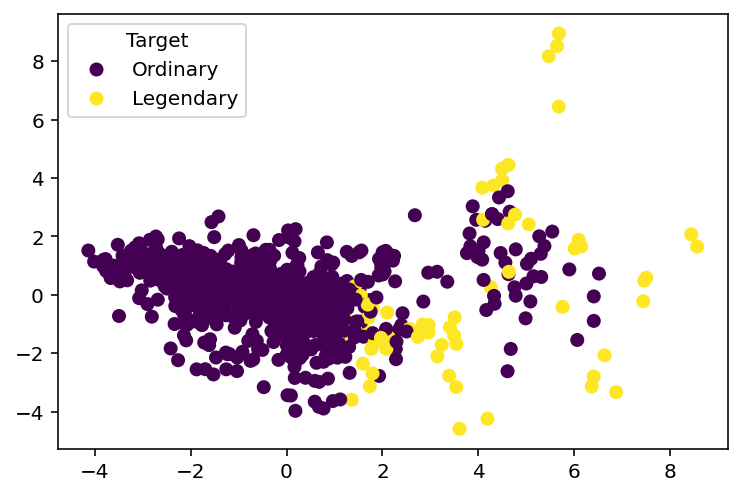

In [110]:
# scatter (c=target)
scatter = plt.scatter(df_2d.iloc[:,0], df_2d.iloc[:,1], c=y)
plt.legend(handles=scatter.legend_elements()[0], title='Target', labels=['Ordinary', 'Legendary'])

In [111]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)

[0.13128493 0.05074115]


In [112]:
print(pca.explained_variance_ratio_.sum())

0.18202607771166715


#### 3차원으로 축소

In [113]:
# 3차원으로 축소할 데이터 복사
df_3d = df.copy()

In [114]:
# PCA
pca = PCA(n_components=3)

In [115]:
df_3d = pca.fit_transform(df_3d)

In [116]:
df_3d.shape

(800, 3)

#### 시각화

In [117]:
# 데이터 프레임 변환
df_3d = pd.DataFrame(df_3d)
df_3d.head()

,0,1,2
0,-2.088483,0.910215,0.870361
1,-1.127668,0.377710,0.354453
2,0.485596,-0.141181,-0.077799
3,4.561859,1.044959,2.465778
4,-0.992333,1.691124,0.438967


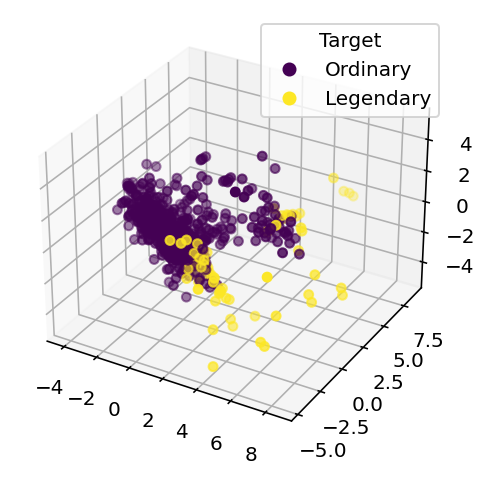

In [118]:
# 시각화 (3차원)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_3d.iloc[:,0], df_3d.iloc[:,1], df_3d.iloc[:,2], c=y)
ax.legend(handles=scatter.legend_elements()[0], title='Target', labels=['Ordinary', 'Legendary'])

In [119]:
# 데이터 설명(%)
print(pca.explained_variance_ratio_)

[0.13128493 0.0507478  0.04814531]


In [120]:
print(pca.explained_variance_ratio_.sum())

0.2301780403533838


In [121]:
# PCA 후 데이터로 머신러닝 (2개의 피쳐)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, df_2d, y, scoring='accuracy', cv=5).mean()

0.9262500000000001

In [122]:
# PCA 후 데이터로 머신러닝 (3개의 피쳐)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, df_3d, y, scoring='accuracy', cv=5).mean()

0.9400000000000001

In [123]:
# PCA 전 데이터로 머신러닝 (13개의 피쳐)
cross_val_score(model, X, y, scoring='accuracy', cv=5).mean()

0.94625

### > 차원을 축소하니 평가 점수가 조금 낮아지긴 했지만 성능이 많이 줄어들지 않았다.

## 회고
분류 모델이 아닌 회귀 모델을 선택하는 실수를 처음에 저질렀었다.   
그러나 같은 조원 덕에 분류 모델로 변경하고 PCA도 실행했다.
전처리가 굉장히 중요하다는 것을 몸소 느낀 실습이었다.